<h1 style="text-align: center;">DATA ANALYSIS: CLEANED StackOverflow DATA</h1>

## 0. PACKAGE REQUIREMENTS

In [1]:
# Packages
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap, rgb2hex

/Users/emilialautz/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 1. READ IN THE DATA

In [2]:
# Read in the candidate data
file_path = '../cleaned_data/candidates_cleaned.csv'
candidates_df = pd.read_csv(file_path)

In [3]:
candidates_df[:5]

,MainBranch,EdLevel,YearsCode,YearsCodePro,DevType,LanguageHaveWorkedWith,ConvertedCompYearly,Gender,Degree_Bachelor,Degree_Master,Degree_Other,Software_Programming,C_Programming,Python_Programming,JavaScript_Programming,Professional_Software_Experience,Management_Skills,Engineer,Previous_Pay
0,"I am not primarily a developer, but I write co...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,5,Data scientist or machine learning specialist;...,C#;C++;HTML/CSS;JavaScript;Python,40205.0,2,0,1,0,0,1,1,1,5,0,1,40205.000000
1,I am a developer by profession,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,17,"Developer, full-stack",C#;JavaScript;SQL;TypeScript,215232.0,2,1,0,0,1,0,0,1,17,0,0,215232.000000
2,I am a developer by profession,Some college/university study without earning ...,37,30,"Developer, desktop or enterprise applications;...",Delphi;Java;Swift,NaN,1,0,0,0,1,0,0,0,30,0,0,227215.672267
3,I am a developer by profession,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,2,"Developer, full-stack;Developer, back-end",Bash/Shell;C#;HTML/CSS;JavaScript;PowerShell;SQL,60307.0,2,1,0,0,1,0,0,1,2,0,0,60307.000000
4,"I am not primarily a developer, but I write co...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,10,Engineering manager,C#;HTML/CSS;JavaScript;PowerShell;Python;Rust;SQL,194400.0,2,1,0,0,0,0,1,1,10,1,0,194400.000000


In [4]:
# Variables in candidates_df
candidates_df.columns

Index(['MainBranch', 'EdLevel', 'YearsCode', 'YearsCodePro', 'DevType',
       'LanguageHaveWorkedWith', 'ConvertedCompYearly', 'Gender',
       'Degree_Bachelor', 'Degree_Master', 'Degree_Other',
       'Software_Programming', 'C_Programming', 'Python_Programming',
       'JavaScript_Programming', 'Professional_Software_Experience',
       'Management_Skills', 'Engineer', 'Previous_Pay'],
      dtype='object')

In [5]:
len(candidates_df)

49005

In [6]:
# Gender Variable
def recode_gender(gender):
    if gender == 1:
        return 'Woman'
    elif gender == 2:
        return 'Man'

candidates_df['Gender'] = candidates_df['Gender'].apply(recode_gender)
candidates_df['Gender'].unique()

array(['Man', 'Woman'], dtype=object)

### PARITY AND PROPORTIONAL DATA SETS

In [7]:
# Create a parity data set
women_df = candidates_df[candidates_df['Gender'] == 'Woman']
men_df = candidates_df[candidates_df['Gender'] == 'Man']

sampled_men_df = men_df.sample(n=len(women_df), random_state=1)
parity_df = pd.concat([women_df, sampled_men_df], ignore_index=True)

parity_df['Gender'].value_counts()

Woman    2329
Man      2329
Name: Gender, dtype: int64

In [8]:
# Create a proportional data set, where women make up 18%
total_women = len(women_df)
women_percentage = 0.18

new_dataset_size = round(total_women/women_percentage)
required_men = new_dataset_size - total_women

sampled_men_df = men_df.sample(n=required_men, random_state=1)
proportional_df = pd.concat([women_df, sampled_men_df], ignore_index=True)

proportional_df['Gender'].value_counts()

Man      10610
Woman     2329
Name: Gender, dtype: int64

## 2. PLOTS

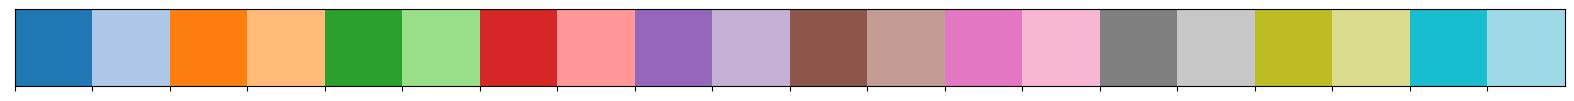

In [9]:
# Set up the colors
tab20_colors = [
    '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', 
    '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5', 
    '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f', 
    '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5'
]

sns.palplot(tab20_colors)

In [10]:
my_blue = tab20_colors[0]
my_light_blue = tab20_colors[1]
my_orange = tab20_colors[2]
my_light_orange = tab20_colors[3]

In [11]:
# Matplotlip settings (for saving figures as pgf files)
#matplotlib.use("pgf")
#matplotlib.rcParams.update({
#    "pgf.texsystem": "pdflatex",
#    "font.family": "serif",
#    'font.size': 12,
#    'text.usetex': True,
#    'pgf.rcfonts': False,
#})

### 2A. Gender distribution

In [11]:
gender_initial = candidates_df['Gender'].value_counts(normalize=True) * 100
gender_parity = parity_df['Gender'].value_counts(normalize=True) * 100
gender_proportional = proportional_df['Gender'].value_counts(normalize=True) * 100

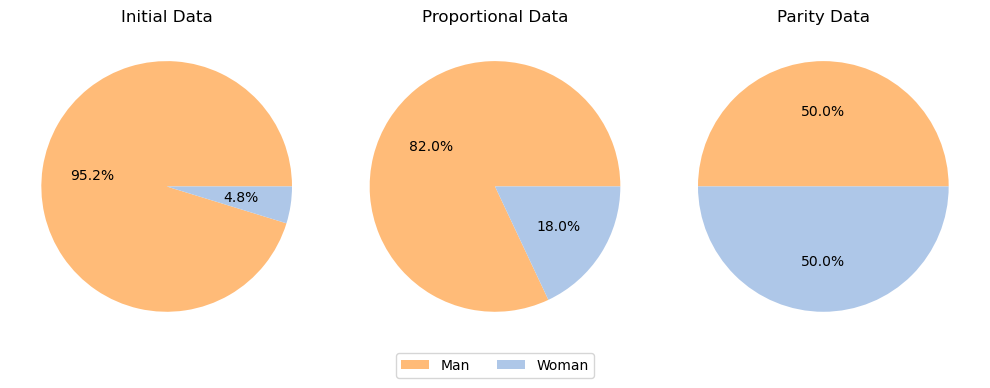

<Figure size 640x480 with 0 Axes>

In [14]:
# Define colors for genders
colors = [my_light_orange, my_light_blue]
gender_labels = gender_initial.index

# Create pie charts
fig, axes = plt.subplots(1, 3, figsize=(10, 4))

# Dataset 1 pie chart
axes[0].pie(gender_initial, labels=None, autopct='%1.1f%%', colors=colors)
axes[0].set_title('Initial Data')

# Dataset 2 pie chart
axes[1].pie(gender_proportional, labels=None, autopct='%1.1f%%', colors=colors)
axes[1].set_title('Proportional Data')

# Dataset 3 pie chart
axes[2].pie(gender_parity, labels=None, autopct='%1.1f%%', colors=colors)
axes[2].set_title('Parity Data')

fig.legend(gender_labels, loc='lower center', ncol=len(gender_labels), bbox_to_anchor=(0.5, -0.01))

plt.tight_layout()
plt.subplots_adjust(bottom=0.01) 
plt.show()
plt.savefig('../../plots/gender_distribution_three_datasets.png')

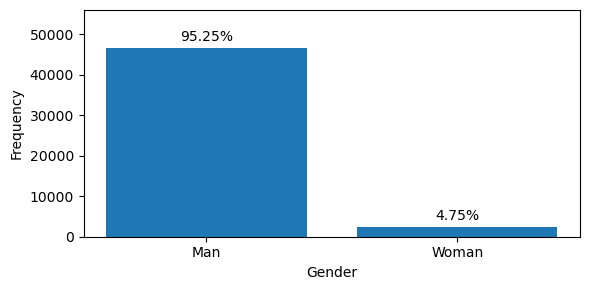

<Figure size 640x480 with 0 Axes>

In [16]:
# Plot the distribution of the gender variable

value_counts = candidates_df['Gender'].value_counts()
total_counts = value_counts.sum()
value_percentages = (value_counts / total_counts) * 100

# Plot the bar plot
plt.figure(figsize=(6, 3))
bars = plt.bar(value_counts.index, value_counts.values, color=my_blue)
plt.xlabel('Gender')
plt.ylabel('Frequency')
#plt.title('Distribution of Gender')
plt.ylim(0, value_counts.max() * 1.2) 

# Annotate the bars with the percentages
for bar, percentage in zip(bars, value_percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height + 1000, f'{percentage:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()
plt.savefig('../../plots/gender_distribution_initial.png')

### 2B. Binary Prerequisites by Gender

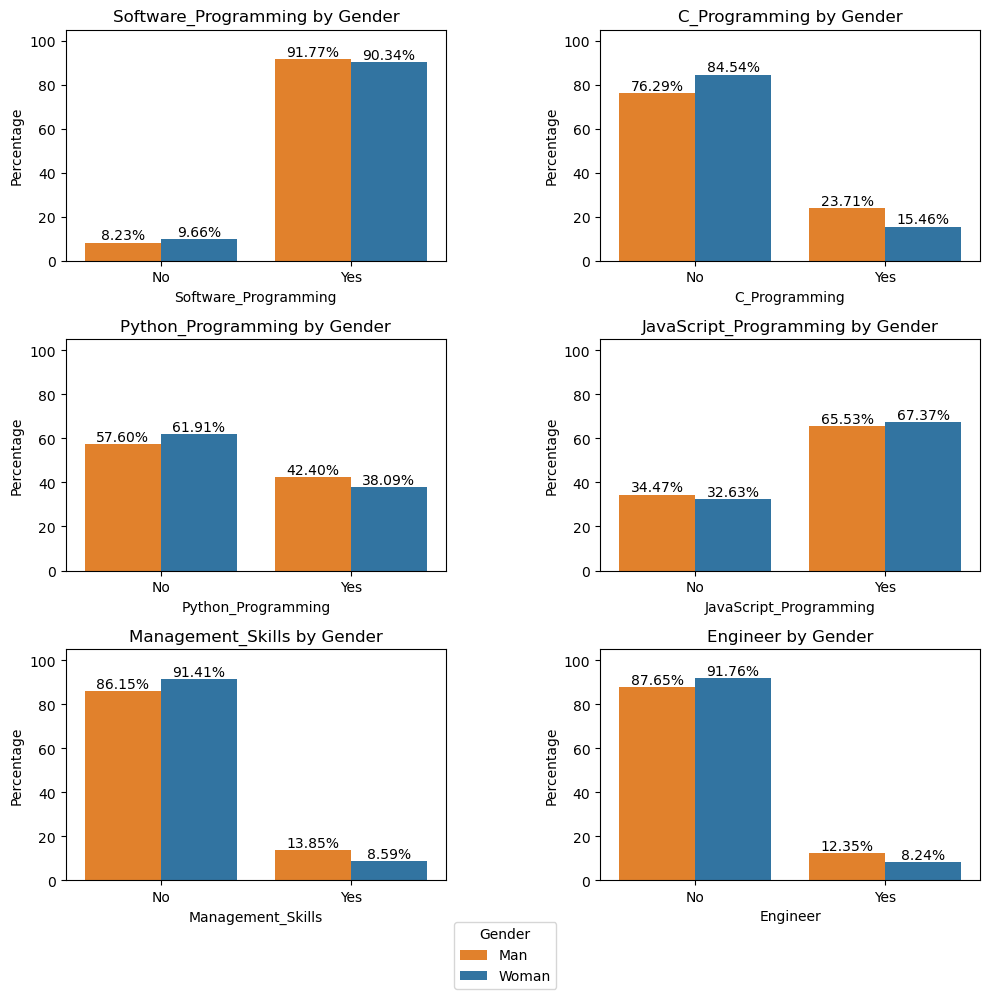

In [17]:
def plot_distribution_with_percentage_by_gender(df, binary_var_name, hue_var_name, ax):
    # Calculate percentages within each gender
    percentage_df = df.groupby(hue_var_name)[binary_var_name].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
    total_counts = df.groupby(hue_var_name)[binary_var_name].count().values

    # Create the bar plot
    sns.barplot(data=percentage_df, x=binary_var_name, y='percentage', hue=hue_var_name, palette=[my_orange, my_blue], ax=ax)
    
    # Annotate the bars with the percentages
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points', color='black')
    
    # Add titles and labels
    ax.set_title(f'{binary_var_name} by {hue_var_name}')
    ax.set_xlabel(binary_var_name)
    ax.set_ylabel('Percentage')
    ax.set_ylim(0, 105)
    ax.get_legend().remove() 
    ax.set_xticklabels(['No', 'Yes'])

fig, axes = plt.subplots(3, 2, figsize=(10, 10))
fig.tight_layout(pad=5.0)

variables = ['Software_Programming', 'C_Programming', 'Python_Programming', 'JavaScript_Programming', 'Management_Skills', 'Engineer']

for var, ax in zip(variables, axes.flatten()):
    plot_distribution_with_percentage_by_gender(candidates_df, var, 'Gender', ax)


plt.legend(loc='lower center', bbox_to_anchor=(-0.25, -0.5), title='Gender')
plt.figsize=(10, 8)
plt.tight_layout()
plt.savefig('../../plots/binary_prerequisites_by_gender.png')
plt.show()


### 2C. Degree (Categorical) by Gender

In [18]:
# Summarise the degree variables

conditions = [
    (candidates_df['Degree_Bachelor'] == 1),
    (candidates_df['Degree_Master'] == 1),
    (candidates_df['Degree_Other'] == 1)
]
choices = ['Bachelor', 'Master', 'Other']

# Apply the conditions to create the 'Degree' column
candidates_df['Degree'] = np.select(conditions, choices, default='None')

candidates_df['Degree'].value_counts()

Bachelor    23276
Master      12880
None        10441
Other        2408
Name: Degree, dtype: int64

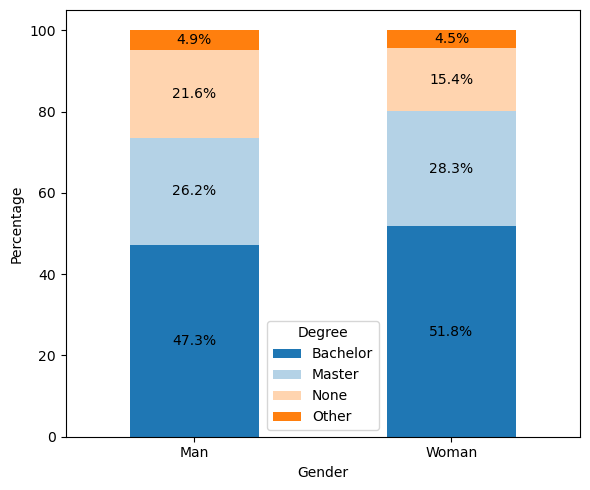

<Figure size 640x480 with 0 Axes>

In [20]:
# Create a custom diverging colormap
colors = [my_blue, 'white', my_orange]
custom_cmap = LinearSegmentedColormap.from_list("custom_diverging_cmap", colors)

# Calculate the percentage distribution
degree_distribution = candidates_df.groupby(['Gender', 'Degree']).size().unstack().fillna(0)
degree_distribution_percentage = degree_distribution.div(degree_distribution.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(6, 5))
degree_distribution_percentage.plot(kind='bar', stacked=True, ax=ax, colormap=custom_cmap)

ax.set_xlabel('Gender')
ax.set_ylabel('Percentage')
ax.legend(title='Degree')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if height > 0: 
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', color='black')
        
plt.tight_layout()
plt.show()
plt.savefig('../../plots/degree_prerequisite_by_gender.png')

### 2D. Professional Software Experience (Continuous) by Gender

In [21]:
# Function to plot density plor of a continuous variable
def plot_density_with_hue(df, column, filename, rounded=False, gender_column='Gender'):
    upper_limit = np.percentile(df[column], 95)

    # Filter the dataframe to exclude outliers
    filtered_df = df[df[column] <= upper_limit]

    plt.figure(figsize=(7, 3.5))

    if rounded:
        plt.ylim(0, 0.000007)
    else:
        plt.ylim(0, 0.12)

    # Women
    sns.kdeplot(data=filtered_df[filtered_df[gender_column] == 'Woman'], x=column, shade=True, color=my_blue, label='Women')
    mean_val_female = filtered_df[filtered_df[gender_column] == 'Woman'][column].mean()
    plt.axvline(mean_val_female, color=my_blue, linestyle='--', linewidth=2, label='Mean Women')
    if rounded:
        offset = 0.015 * (plt.xlim()[1] - plt.xlim()[0]) 
        plt.text(mean_val_female - offset, plt.ylim()[1]*0.9, f'{mean_val_female:.0f}', color=my_blue, ha='right')
    else:
        offset = 0.01 * (plt.xlim()[1] - plt.xlim()[0]) 
        plt.text(mean_val_female - offset, plt.ylim()[1]*0.9, f'{mean_val_female:.2f}', color=my_blue, ha='right')

    # Men
    sns.kdeplot(data=filtered_df[filtered_df[gender_column] == 'Man'], x=column, shade=True, color=my_orange, label='Men')
    mean_val_male = filtered_df[filtered_df[gender_column] == 'Man'][column].mean()
    plt.axvline(mean_val_male, color=my_orange, linestyle='--', linewidth=2, label='Mean Men')
    if rounded:
        offset = 0.015 * (plt.xlim()[1] - plt.xlim()[0]) 
        plt.text(mean_val_male + offset, plt.ylim()[1]*0.9, f'{mean_val_male:.0f}', color=my_orange, ha='left')
    else:
        offset = 0.01 * (plt.xlim()[1] - plt.xlim()[0]) 
        plt.text(mean_val_male + offset, plt.ylim()[1]*0.9, f'{mean_val_male:.2f}', color=my_orange, ha='left')


    # Add labels, title, and legend
    if rounded:
        plt.xlabel(f'Previous Pay in USD')
    else:
        plt.xlabel(f'Professional Software Experience in Years')
    
    plt.ylabel('Density')
    plt.legend()

    plt.tight_layout()
    plt.show()
    plt.savefig(filename)

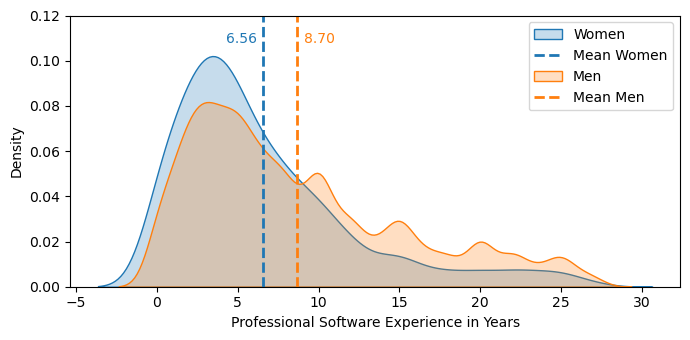

<Figure size 640x480 with 0 Axes>

In [22]:
# Professional Software Experience
plot_density_with_hue(candidates_df, 'Professional_Software_Experience', '../../plots/prof_software_exp_distribution.png')

### 2E. Previous Payment (Continuous) by Gender

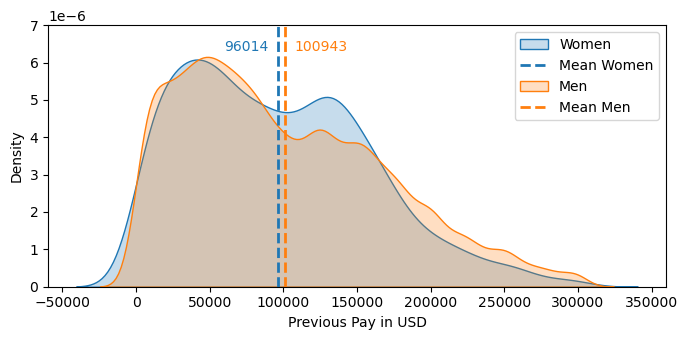

<Figure size 640x480 with 0 Axes>

In [23]:
# Previous_Pay
plot_density_with_hue(candidates_df, 'Previous_Pay', '../../plots/previous_pay_distribution.png', rounded=True)